## 第五章 基于数组的序列

### 5.2 低层次数组

1字节 = 8位

存储地址：计算机用于跟踪信息存储在哪个字节。每个存储字节都和一个作为其地址的唯一数字相关联，这些数字是连续的。

给定存储地址，检索和存储RAM(Random Access Memory)的运行时间为O(1)。

编程语言记录标识符（变量名）与所存储的地址之间的联系。

数组（array）：一组相关变量能够一个接一个地存储在计算机存储器的一块连续区域内。

编程语言中，变量名与存储地址相联系，而数组是一组变量，每个变量指向的存储地址是挨在一起的，而表示存储地址的数字是连续的，因此可以通过索引+第一个元素的存储地址来访问其他元素，这对数组来说很方便。

Python中的str类是文本数组（array），字符的存储地址是连续的，Python使用16位，即两个字节来存储一个字符，一个字符串的所有字符存储地址连续。

Python使用Unicode来给字符编码，因此每个字符用两个字节存储（Unicode就是如此）。

1个byte含8个bit，一个bit存储0,1；因此1个byte最大可以存储的十进制数字是255（即二进制11111111），这255个十进制数字用于ASCII编码，以通过数字来表示字符（计算机只能处理数字），这就是ASCII编码，1个byte存储的数字可以表示一个字符，而Unicode需要2个byte存储一个字符，当然能存储的字符也更多，包括通用语言的字符。

数组中的每一个位置称为单元（cell）。

数组中的每个单元必须占据相同数量的byte，这允许通过索引值和第一个单元存储地址来计算其他单元的存储地址，从而直接进行访问。访问时间为常量时间，即O(1)。

#### 5.2.1 引用数组

浅拷贝：列表的每一个元素指向相同的存储位置，若每一个元素是不可变的，则没有影响。但若是可变的，如每一个元素都是一个list，那么改变其中一个列表会导致另外一个列表也改变。这时需要深拷贝，创建一个存储地址完全不一样的副本。

语法`mylist = [0]*8`会创建一个list，所有元素指向一个存储地址中的0，由于0不可变，所以没有什么影响。

list的方法`extend`会将一个列表的引用复制到列表，相当于浅拷贝到末尾。

Python中的list和tuple都使用引用结构，即list首先存储的是元素的存储地址，然后调用时，先获得元素的存储地址再获得元素，整个过程相当于list引用了一块连续内存中的元素，而不是将元素直接存储在list中。因此会出现两个list指向了同一块内存，改变一个list相当于改变了所引用的这一块内存，这导致另一个list随之改变。

在list的引用问题中，要分析不同的情况，有时两个list引用了同一块连续的内存，有时两个list的各个元素指向同一个地址，这两种情况是不同的，前者可以通过改变一个list来改变另外一个，后者需要每个元素指向的地址存储的元素是可变的。

引用的好处在于列表每个元素占用内存的大小可能差别很大，会违反数组每个元素占用相同内存的规则，但是用最大元素内存来存储又浪费空间，因此先将所有元素存储在一块内存中，再将64位内存地址（固定为64位）存储在一个数组中，通过数组的索引可以获得相应元素内存地址的存储位置，获得相应元素的内存地址后再访问，即可。

引用数组每个元素存储地址连续，但是指向的存储地址可能是不连续的。

#### 5.2.2 Python中的紧凑数组

紧凑数组（compact array）：数组每个元素直接存储，而不是引用（引用相当于存储的是所引用元素的内存地址）。

引用数组占用内存大于紧凑数组，引用数组每个元素都存储64位即8字节的内存地址，无论存储单个元素的对象有多少位，而紧凑数组，如Python中的字符串，每个元素为2个字节即16位。（Unicode字符）

Python的list为什么占内存：引用的元素存储在内存中，又将64位地址存储进list中，比紧凑型多出64位地址存储所需的内存空间。

array模块的array类可以创建紧凑数组。紧凑数组占用内存少，在计算时的速度也快，在对很多整数进行处理时，可以创建紧凑数组进行存储。

In [2]:
from array import array

primes = array('i', [2, 3, 5, 7, 11, 13, 17, 19])                         ## 先指明元素的类型，'i'表示整数

因为紧凑数组是直接存储元素，而不是64位存储地址，因此需要通过元素类型来判断一个元素需要多少位的内存。

有很多数据类型可以选择，但是要是没有想要的，那么array模块不能满足需求，因为不能自定义，这时应该使用ctypes模块。

### 5.3 动态数组和摊销

一般而言，数组存储在一段连续的内存中，系统可能占用周围的内存，因此数组是不能无限制变大的。Python的str和tuple不存在这个问题，因为他们不可变。

Python的list类是动态数组（dynamic array），创建一个list时，会根据list的长度预留更长的数组，因此list类增添数组很容易。当增加的元素过多，预留的空间也被用完时，才会向系统请求一个新的更大的数组。原来的数组就被回收。

In [5]:
import sys

a = []
b = [1, 2]
c = [[1, 2, 4, 5, 6, 7], [3, 4, 5, 6, 7, 8]]
print(sys.getsizeof(a))
print(sys.getsizeof(b))
print(sys.getsizeof(c))

64
80
80


空list已经占有64个字节的内存。getsizeof返回list存储64位内存地址的数组所用空间，不包括引用的元素占用的内存。

list预留内存空间，会使list占用的内存随着元素个数的增加而呈现阶梯式上升，每次上升都是因为预留空间使用完。

在Python中，预留的大小的规律尚不确定，作练习研究，一个元素需要64位即8个字节，4个元素就是32个字节，所以每次请求下一个新的数组后，增加4个元素将不会引起内存变化，再增加一个将会使内存直接增大32个字节，这里不需要考虑引用元素，就单纯研究存储64位2内存地址的数组。实验代码如下：

In [14]:
import sys

data = []
for k in range(30):
    a = len(data)
    b = sys.getsizeof(data)
    print('Length: {0:3d}; Size in bytes: {1:4d}'.format(a, b))
    data.append(None)

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192
Length:  10; Size in bytes:  192
Length:  11; Size in bytes:  192
Length:  12; Size in bytes:  192
Length:  13; Size in bytes:  192
Length:  14; Size in bytes:  192
Length:  15; Size in bytes:  192
Length:  16; Size in bytes:  192
Length:  17; Size in bytes:  264
Length:  18; Size in bytes:  264
Length:  19; Size in bytes:  264
Length:  20; Size in bytes:  264
Length:  21; Size in bytes:  264
Length:  22; Size in bytes:  264
Length:  23; Size in bytes:  264
Length:  24; Size in bytes:  264
Length:  25; Size in bytes:  264
Length:  26; Size in bytes:  344
Length:  27; Size in bytes:  344
Length:  28; Size in bytes:  344
Length:  29; Size in bytes:  344


#### 5.3.2 动态数组的摊销分析

通常来说，动态数组在预留的内存用完后需要创建一个新的数组，新数组可以存储的元素个数是原来的两倍。在添加元素的过程中，如果预留内存没用完，运行时间为常量时间，如果用完了，则需要O(n)。在每一次付出代价之后，可以存储跟原来相同的元素个数的元素，才需要重新付出代价，而付出大代价的个数事实上只是对数次而已，因为元素个数是指数增长的。

摊销（amortization）、摊销分析（amortization analysis）

> 命题5-1：设S是一个由具有初始大小的动态数组实现的数组，实现策略为：当数组已满时，将此数组大小扩大为原来的2倍。S最初为空，对S连续执行n个增添操作的运行时间为O(n)。

命题5-1与之前的不同之处在于，之前的时间复杂度是按照一次增添操作来计算的，这里的是按n次来计算的，原因是n次操作中会有操作需要扩充数组，所需时间比不需要扩充数组时要长，使用平均或者摊销分析的方式，可以分析n次操作的总时间。由于每次将数组扩充为原来的两倍，那么从$2^n$到$2^{n+1}$大小的过程中，需要时间$O(2^n)$，假设每次操作需要时间为1，那么这里将$2^n$分给索引为$2^{n-1}+1$到$2^n$的元素，每个元素多分时间2，即每次操作需要时间3，那么就可以忽略扩充数组的时间了，而$3n$仍然是O(n)，因此n次操作需要O(n)时间，但是不能说一次操作，一次操作容易引起误解，同时也不是每次操作都是O(1)，而是摊销后为O(1)。

为什么会变成n次O(n)：每次扩充新数组为2n时，距离上一次扩充为n/2个元素。

结论：数组大小几何增长，则每次操作的摊销运行时间仍未O(1)。（一定要强调是`摊销`运行时间）

几何增长（成倍增长）的优点是摊销运行时间快，缺点是占用空间大，牺牲了空间换来了时间。（但空间复杂度仍然为O(n)）

可以选用较小的几何增长速度，如1.25，但是这会换来较多的扩充次数，而且只要是倍数，在数组大到一定程度时就可能导致内存空间的浪费。

如果是每次扩充数列都预留k个元素的内存，那么事实上效率较低，但是在空间是更为节省，时间上n次操作需要$O(n^2)$，以预留一个元素为例很容易证明，预留k个也可证明。（这是等差数列增长）

> 命题5-2：对初始为空的动态数组执行连续n个增添操作，若每次调整数组大小时采用固定的增量，则运行时间为$\Omega(n^2)$。

等差数列求和有公式，或者提取常数变成1+2+3+...，令$m=n/c$也是一个技巧。

Python的list的底层数组（即存储64位存储地址的数组）是一个动态数组。同时list本身是一个引用数组而不是一个紧凑数组。

### 5.4 Python序列类型的效率（list、tuple、dict、str）

### 5.4.1 Python的list和tuple类

tuple的内存利用率比list高，因为tuple不可变，不需要预留内存空间。

list和tuple的nonmutating行为效率：

操作 | 运行时间 | 原因
:-: | :-: | :-:
len(data) | O(1) | 实例中存储了长度，直接访问
data[j] | O(1) | list和tuple底层是数组，访问元素可直接获得内存地址
data.count(value) | O(n) | 显然计算有多少个是需要遍历的
data.index(value) | O(k+1) | k为索引，k+1是个数，找到了就停止
value in data | O(k+1) | 找到了就停止
data1 == data2（包括其他表示大小关系的符号） | O(k+1) | 有不相等就停止
data[j:k] | O(k-j+1) | 显然
data1 + data2 | O(n1+n2) | 创建了一个新的list或者tuple
c\*data | O(cn) | 创建了一个新的数组 

涉及到k的，在最坏的情况下就是n了！！！

list和tuple的mutating行为效率：

操作 | 运行时间 | 原因
:-: | :-: | :-:
data[j] = value | O(1) | 改变一个值
data.append(value) | O(1)<sup>*</sup> | 摊销运行时间，不过list和tuple动态数组是如何实现的还不知道，不是单纯几何增长
data.insert(value) | O(n-k+1)<sup>*</sup> | 摊销运行时间，需要将后面的元素往后移，如果是最坏情况则为O(n)，摊销是考虑是否有足够空间
data.pop() | O(1)<sup>*</sup> | 摊销运行时间，但是不明白为什么需要摊销
data.pop(k)、del data[k] | O(n-k)<sup>*</sup> | 删掉一个时，需要移动剩下的，保证数组连续
data.remove(value) | O(n)<sup>*</sup> | 摊销运行时间，这个不太清楚
data1.extend(data2)、data1 += data2 | O(n<inf>2</inf><sup>*</sup>) | 摊销运行时间，相当于append了n<inf>2</inf>个
data.reverse() | O(n) | 可以从递归理解
data.sort() | O(nlog n) | 最快的排序为O(nlog n)

在list的最开始位置insert元素是最费时的。

Python不定时地收缩底层数组以节省内存，因此pop方法是摊销来计算的。（收缩数组也费时间，只是可能比较短）

pop与del区别：pop默认删除最后一个，del没有默认；pop可以保存删除的元素，del直接删除，没得保存。

remove方法仅删除一个值，找到了值，左边的需要遍历，右边的删除完值后要左移，所以一定是O(n)，至于摊销，是因为收缩数组造成的。

### 5.4.2 Python的str类

将字符串中的空格、数字、标点符号去掉，我们想到的方法可以是将这些替换为空，也可以是遍历字符串，将字母提取出来形成一个新的字符串。在这个过程中，由于str不可变，如果每次直接`string += c`的话，n次操作O(n<sup>2</sup>)的运行时间；改进方法是先用可变的list存储，n次操作需要O(n)（摊销分析），最后join一下就好。由于是从一个可迭代的对象生成list或者另一个可迭代对象，所以可以用列表生成式简化代码并优化运行速度，如果用生成器（即圆括号）则更快。

### 5.5 使用基于数组的序列

我们对array和Python中的list的理解有些狭隘，它们的元素不仅能是数字，也可以是字符，64位存储地址（也是数字），还可以是一个个的类的实例等。

对类的私有变量，如果外界想获取，需要通过定义的方法进行return。

#### 5.5.2 插入排序

一句话总结：前面的元素有序，后面的元素无序，对后面的元素进行外层遍历，内层遍历为每个元素前面的元素，比较大小决定插入到什么位置，因此称为插入排序。

In [1]:
def insert_sort(sequence):
    j = 1
    while j <= len(sequence)-1:
        for i in range(j):
            if sequence[i] >= sequence[j]:
                sequence.insert(i, sequence[j])
                del sequence[j+1]
                break
        j += 1
    return sequence

In [2]:
print(insert_sort([2, 35, 12, 25, 563, 213, 21]))
print(insert_sort([1, 24, 123, 12, 43, 14, 132, 121, 11]))

[2, 12, 21, 25, 35, 213, 563]
[1, 11, 12, 14, 24, 43, 121, 123, 132]


插入排序的效率可能受到insert方法的影响。但是如果将insert方法的效率也考虑进去，那么就相当于分析的是Python中的插入排序了。

### 5.6 多维数据集

在Python中，矩阵一般用list的list来存储。有时需要初始化一个list的list。

In [8]:
mylist = [[0]*3]*10
print(mylist)
mylist[0][0] = 1
print(mylist)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]]


上面这一种初始化方法的缺点是，经由\*3的作用，每个元素list的3个元素都指向同一个int——0，经由\*10的作用，每个元素都指向一个list的实例\[0, 0, 0\]，而list可变，所以改变第一个list会影响所有list。

In [9]:
mylist = [[0]*3 for i in range(10)]
print(mylist)
mylist[0][0] = 1
print(mylist)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[1, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


这个方法，使用了列表推导，在每一次循环的时候，都会创建一个不同的list实例，让每个元素都指向特定的实例。

### 5.7 练习

R-5.1

In [11]:
import sys

data = []
for k in range(50):
    a = len(data)
    b = sys.getsizeof(data)
    print('Length: {0:3d}; Size in bytes: {1:4d}'.format(a, b))
    data.append(None)

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192
Length:  10; Size in bytes:  192
Length:  11; Size in bytes:  192
Length:  12; Size in bytes:  192
Length:  13; Size in bytes:  192
Length:  14; Size in bytes:  192
Length:  15; Size in bytes:  192
Length:  16; Size in bytes:  192
Length:  17; Size in bytes:  264
Length:  18; Size in bytes:  264
Length:  19; Size in bytes:  264
Length:  20; Size in bytes:  264
Length:  21; Size in bytes:  264
Length:  22; Size in bytes:  264
Length:  23; Size in bytes:  264
Length:  24; Size in bytes:  264
Length:  25; Size in bytes:  264
Length:  26; Size in bytes:  344
Length:  27; Size in bytes:  344
Length:  28; Size in bytes:  344
Length:  29; Size in bytes:  344
Length:  3

R-5.2

In [16]:
data = []
b = sys.getsizeof(data)
for k in range(200):
    a = sys.getsizeof(data)
    if a > b:
        print(k-1)
    b = a
    data.append(None)

0
4
8
16
25
35
46
58
72
88
106
126
148
173


R-5.3

删除元素时，内存空间会收缩，但不是立即收缩，而是以某种规律。

In [20]:
n = 101
data = [None]*n
for k in range(n):
    data.pop()
    a = len(data)
    b = sys.getsizeof(data)
    print('Length: {0:3d}; Size in bytes: {1:4d}'.format(a, b))

Length: 100; Size in bytes:  872
Length:  99; Size in bytes:  872
Length:  98; Size in bytes:  872
Length:  97; Size in bytes:  872
Length:  96; Size in bytes:  872
Length:  95; Size in bytes:  872
Length:  94; Size in bytes:  872
Length:  93; Size in bytes:  872
Length:  92; Size in bytes:  872
Length:  91; Size in bytes:  872
Length:  90; Size in bytes:  872
Length:  89; Size in bytes:  872
Length:  88; Size in bytes:  872
Length:  87; Size in bytes:  872
Length:  86; Size in bytes:  872
Length:  85; Size in bytes:  872
Length:  84; Size in bytes:  872
Length:  83; Size in bytes:  872
Length:  82; Size in bytes:  872
Length:  81; Size in bytes:  872
Length:  80; Size in bytes:  872
Length:  79; Size in bytes:  872
Length:  78; Size in bytes:  872
Length:  77; Size in bytes:  872
Length:  76; Size in bytes:  872
Length:  75; Size in bytes:  872
Length:  74; Size in bytes:  872
Length:  73; Size in bytes:  872
Length:  72; Size in bytes:  872
Length:  71; Size in bytes:  872
Length:  7

R-5.5

摊销到每次操作为7个硬币。

R-5.7

长度为n的数组，含1到n-1的整数，有一个整数是重复，如何找到？

如果每个数都遍历其后的数，需要O(n<sup>2</sup>)，先进行排序，再进行前后比较，需要O(n+nlog n)即O(nlog n)。

In [35]:
def quick_sort(sequence):
    if len(sequence) == 1 or len(sequence) == 0:
        return sequence
    else:
        greater_seq = []
        less_seq = []
        a = sequence[0]
        del sequence[0]
        for i in sequence:
            if i >= a:
                greater_seq.append(i)
            else:
                less_seq.append(i)
        return quick_sort(less_seq) + [a] + quick_sort(greater_seq)

def find_repeatition(sequence):
    sequence = quick_sort(sequence)
    for i in range(1, len(sequence)):
        if sequence[i] == sequence[i-1]:
            return sequence[i]
    return False

In [36]:
print(find_repeatition([10, 9, 9, 8, 7, 6, 5, 4, 3, 2, 1]))

9


R-5.8

In [9]:
from time import time

test_list = [k for k in range(1000000)]

start = time()
for i in range(100):
    test_list.pop()
print((time()-start))

start = time()
for i in range(100):
    test_list.pop(500000)
print((time()-start))

start = time()
for i in range(100):
    test_list.pop(0)
print((time()-start))

0.0
0.04587864875793457
0.10674262046813965


R-5.11

In [43]:
def get_sum(data):
    result = 0
    for i in data:
        if i:
            for j in i:
                result += j
    return result

In [44]:
print(get_sum([[1, 2, 3], [2, 5], []]))

13


R-5.12

In [49]:
def get_sum(data):
    return sum((sum(k) for k in data))

In [51]:
print(get_sum([[1, 2, 3], [2, 5], []]))

13


C-5.13

In [52]:
data = [0, 1, 2, 3]
for k in range(50):
    a = len(data)
    b = sys.getsizeof(data)
    print('Length: {0:3d}; Size in bytes: {1:4d}'.format(a, b))
    data.append(None)

Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192
Length:  10; Size in bytes:  192
Length:  11; Size in bytes:  192
Length:  12; Size in bytes:  192
Length:  13; Size in bytes:  192
Length:  14; Size in bytes:  192
Length:  15; Size in bytes:  192
Length:  16; Size in bytes:  192
Length:  17; Size in bytes:  264
Length:  18; Size in bytes:  264
Length:  19; Size in bytes:  264
Length:  20; Size in bytes:  264
Length:  21; Size in bytes:  264
Length:  22; Size in bytes:  264
Length:  23; Size in bytes:  264
Length:  24; Size in bytes:  264
Length:  25; Size in bytes:  264
Length:  26; Size in bytes:  344
Length:  27; Size in bytes:  344
Length:  28; Size in bytes:  344
Length:  29; Size in bytes:  344
Length:  30; Size in bytes:  344
Length:  31; Size in bytes:  344
Length:  32; Size in bytes:  344
Length:  33; Size in bytes:  344
Length:  3

C-5.14

In [5]:
import random

def myshuffle(sequence):
    result = []
    while sequence:
        r = random.randrange(0, len(sequence))
        result.append(sequence[r])
        del sequence[r]
    return result

In [7]:
print(myshuffle([k for k in range(100)]))

[7, 71, 52, 95, 89, 58, 43, 36, 73, 82, 53, 93, 3, 46, 96, 68, 66, 13, 80, 72, 9, 91, 10, 20, 84, 37, 4, 83, 79, 48, 12, 87, 30, 8, 26, 62, 55, 31, 5, 75, 60, 78, 34, 81, 94, 49, 44, 33, 50, 21, 69, 15, 28, 39, 97, 61, 77, 51, 88, 16, 57, 98, 63, 70, 85, 47, 35, 45, 2, 42, 41, 24, 76, 0, 23, 54, 99, 74, 92, 29, 86, 19, 27, 1, 14, 67, 90, 22, 11, 65, 59, 25, 38, 32, 40, 17, 56, 64, 18, 6]


C-5.15

摊销即可。这个把握一下每次扩大数组与前一次扩大数组相差的元素个数就可以了。

C-5.21

In [13]:
n = 1000000
## 第一种
test_str = ''

start = time()
for i in range(n):
    test_str += 'a'
print(time()-start)

## 第二种
test_str = ''
test_list = []

start = time()
for i in range(n):
    test_list.append('a')
test_str = ''.join(test_list)
print(time()-start)

## 第三种
start = time()
test_str = ''.join(['a' for k in range(n)])
print(time()-start)

## 第四种
start = time()
test_str = ''.join(('a' for k in range(n)))
print(time()-start)

0.30354928970336914
0.15617799758911133
0.09373092651367188
0.11195969581604004


C-5.22

In [19]:
list_n = [1000, 10000, 100000, 1000000]

for i in list_n:
    
    x = [k for k in range(i)]
    y = [k for k in range(i)]
    start = time()
    x.extend(y)
    print('列表长度为{0:<10}，extend运行时间为{1:<10}'.format(i, time()-start))
    
    x = [k for k in range(i)]
    start = time()
    for j in y:
        x.append(j)
    print('列表长度为{0:<10}, append运行时间为{1:<10}'.format(i, time()-start))

列表长度为1000      ，extend运行时间为0.0       
列表长度为1000      , append运行时间为0.0009989738464355469
列表长度为10000     ，extend运行时间为0.0       
列表长度为10000     , append运行时间为0.0009927749633789062
列表长度为100000    ，extend运行时间为0.001994609832763672
列表长度为100000    , append运行时间为0.027922868728637695
列表长度为1000000   ，extend运行时间为0.01598834991455078
列表长度为1000000   , append运行时间为0.16358160972595215


C-5.23

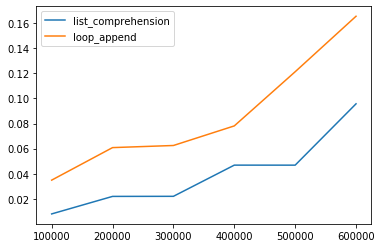

In [25]:
import matplotlib.pyplot as plt

list_n = [100000, 200000, 300000, 400000, 500000, 600000]
time_x, time_y = [], []

for i in list_n:
    x = []
    y = []
    
    start = time()
    x = [k*k for k in range(i)]
    time_x.append(time()-start)
    
    start = time()
    for k in range(i):
        y.append(k*k)
    time_y.append(time()-start)

plt.plot(list_n, time_x, label='list_comprehension')
plt.plot(list_n, time_y, label='loop_append')

plt.legend()

C-5.24

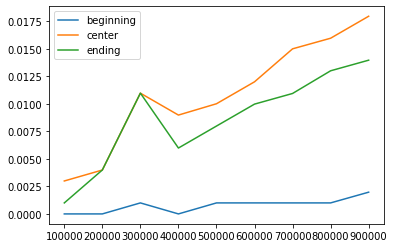

In [27]:
list_n = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000]
time_x, time_y, time_z = [], [], []

for i in list_n:
    
    x = [k for k in range(i)]
    
    start = time()
    x.remove(0)
    time_x.append(time()-start)
    
    start = time()
    x.remove(i/2)
    time_y.append(time()-start)
    
    start = time()
    x.remove(i-3)
    time_z.append(time()-start)

plt.plot(list_n, time_x, label='beginning')
plt.plot(list_n, time_y, label='center')
plt.plot(list_n, time_z, label='ending')

plt.legend()

C-5.25

要remove多个，重复使用remove可能效率较低，因为每次删除一个都要遍历前面的和移动后面的，最坏的情况下时间复杂度是O(n<sup>2</sup>)。

In [30]:
def remove_all(sequence, value):
    result = []
    for k in sequence:
        if k != value:
            result.append(k)
    return result

In [32]:
print(remove_all([1, 2, 3, 1, 1, 3, 2, 1], 1))

[2, 3, 3, 2]


C-5.26

找出5个重复的元素，思路和之前一样，快速排序+遍历搞定。

C-5.29

只能想出一个双层循环进行遍历的方法，不知道有没有更加高效的方法。